# Logistic Regression

Logistic Regression is a statistical model used for binary classification problems. It estimates the probability that an instance belongs to a particular class and is the building block of some neural nets.

**Typical Use Cases:**
- Predicting whether an email is spam or not.
- Classifying customer churn (churn vs. stay).
- Medical diagnosis (disease vs. no disease).


## Pros, Cons, and When to Use

**Pros:**
- Easy to implement and interpret.
- Fast to train.
- Works well for linearly separable classes.

**Cons:**
- Assumes linearity between independent variables and log-odds.
- Struggles with multicollinearity.
- Can underperform with highly complex or non-linear data.

**When to Use:**
- When you need a baseline binary classifier.
- When interpretability matters.
- When the relationship between features and the target is approximately linear.

In [1]:
# For visualisations
from Visualisations import *

# For functions
from Functions import Logistic_Regression_Scratch

# Instantiate the instance of the class
functions = Logistic_Regression_Scratch()


## Motivation

Consider the linear regression model  

$$ Y = x^{\top}\beta + \epsilon$$

where the expected value of $Y$ given $x$ written as $E[Y|x]$ is equal to $x^{\top}\beta$.

This makes sense for numerical values but what about categorical?

---


## Predicting Breast Cancer Example

In [2]:
from sklearn.datasets import load_breast_cancer

# Load breast cancer data
cancer = load_breast_cancer()

In [3]:
# Print the description and details of the data
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## Creating Variables and Organising Data  

The data was collected to identify whether a tumor biopsy was malignant $(0)$ or benign $(1)$.  
A malignant tumor requires medical intervention.  



$X = $ **Attribute/Feature Variables** (columns containing the measurements for each observation $x_{i}^{\top}$)

$Y = $ **Class/Target Variable** (column containing the diagnosis for each observation $y_{i}$)

In [4]:
import pandas as pd

# Create a dataframe from the cancer data and label the columns with the features they represent
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# Add the target variable 'Diagnosis' as a column in the dataframe
cancer_df['Diagnosis'] = cancer.target  

### Check the data

In [5]:
# View the first 10 observations
cancer_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [6]:
# View summary stats of the data
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Is the data balanced?

If the minority class is less than 20–30% of the total data, it’s starting to be imbalanced.

If a class is below 10%, it’s considered highly imbalanced and will likely need special handling (like stratification, resampling, or class-weighted models).  

An imbalanced dataset runs the risk of accidentally ending up with few or no examples of the minority class when randomly split into training and testing sets.

In [7]:
# Get value counts
counts = cancer_df['Diagnosis'].value_counts()

# Calculate ratio: minority / majority
imbalance_ratio = counts.min() / counts.max()

# Print class counts with labels
print("Class counts:")
print(f"Malignant (1): {counts[0]}")
print(f"Benign    (0): {counts[1]}\n")

# Print imbalance ratio
print(f"Minority-to-majority class ratio: {imbalance_ratio:.2f}")

Class counts:
Malignant (1): 212
Benign    (0): 357

Minority-to-majority class ratio: 0.59


### Create feature variables $X$ and target variables $y$ from dataframe

In [8]:
# X = All of the columns from the full cancer_df except the class/target variable 'Diagnosis'
X = cancer_df.drop('Diagnosis', axis = 1).values # shape (n_samples, n_features)

# y = Keep only the class/target variable 'Diagnosis' and reshape it from a 1D array to a 2D column vector
y = cancer_df['Diagnosis'].values.reshape(-1, 1) # shape (n_samples, 1)

### Split data for training and testing

In [9]:
import numpy as np

# Define a function that takes in data, splits it randomly into training and test sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Splits feature and target arrays into training and testing sets.

    Parameters:
    -----------
    X : np.ndarray
        Feature array.
    y : np.ndarray
        Target array.
    test_size : float, optional (default=0.2)
        Proportion of the dataset to include in the test split.
    random_state : int, optional
        Random seed for reproducibility.

    Returns:
    --------
    X_train, X_test, y_train, y_test : tuple
        The split feature and target arrays for training and testing.
    """

    # Set random seed for reproducibility
    if random_state is not None:
        np.random.seed(random_state)

    # Get total number of samples
    n_samples = X.shape[0]

    # Generate a shuffled array of indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    # Compute number of test samples
    test_count = int(n_samples * test_size)

    # Split indices for test and train
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]

    # Use the indices to split X and y
    X_train = X[train_indices]
    X_test  = X[test_indices]
    y_train = y[train_indices]
    y_test  = y[test_indices]

    return X_train, X_test, y_train, y_test

In [10]:
# Split the data with train_test_split function created
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
# Check the shapes
print(f'Training Features Shape: {X_train.shape}')
print(f'Test Features Shape: {X_test.shape}')
print(f'Training Target Shape: {y_train.shape}')
print(f'Test Target Shape: {y_test.shape}')

Training Features Shape: (456, 30)
Test Features Shape: (113, 30)
Training Target Shape: (456, 1)
Test Target Shape: (113, 1)


### Standardise the data  

**When to use Standardization or Normalization:**

- Logistic Regression is sensitive to the scale of features.
- Use **Standardization** (zero mean, unit variance) if features have different units or scales.

Different units of measurement in the feature columns may create bias in the results, so after we split the data we should standardise it. It is best to split the data first so the mean and standard deviation is calculated only on our training set. This prevents 'data leakage' or information from the data we want to train our model on from being shared with the out of sample test data. 

In [12]:
def standardize_train_test(X_train, X_test):
    """
    Standardises the training and testing sets by subtracting the 
    mean of the training data and dividing the result by the 
    standard deviation of the training data for each observation
    in the training and test sets.

    Parameters:
    -----------
    X_train : np.ndarray
        Training array.
    X_test : np.ndarray
        Test array.

    Returns:
    --------
    Standardised training and test data using the mean and standard deviation
    of the training set.
    """
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)

    X_train_st = (X_train - mean) / std
    X_test_st = (X_test - mean) / std  # use training mean and std

    return X_train_st, X_test_st

In [13]:
# Apply standardisation function to the training and test features
X_train_st, X_test_st = standardize_train_test(X_train, X_test)

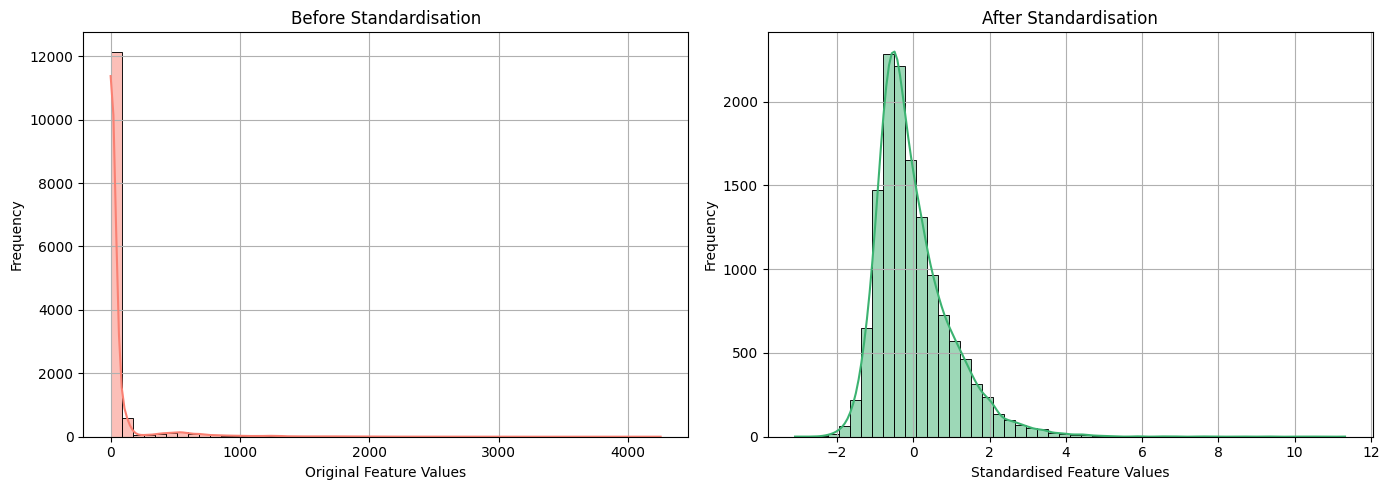

In [14]:
standardisation_plot(original_data = X_train, standardised_data = X_train_st)

Note that we are simply standardising the data so any skewness, heavy tails, or multiple nodes will remain. We have centered it so the mean is $0$ and the standard deviation is $1$.

## Encoding Categories  

Assume the output $Y$ has only two categories such as True/False, Heads/Tails, or Benign/Malignant in our example.

$Y \in \{c_0, c_1\}$

We can encode these categories in $c_0 := 0$ and $c_1 := 1$ so that $Y \in \{0, 1\}$

$$E[Y | x] = 0 \cdot P(Y = 0 | x) + 1 \cdot P(Y = 1 | x) = P(Y = 1 |x) \overset{\text{denote}}{=} \pi$$  

So for a given value $x \in \mathbb{R}^{p}$ we would like to predict if $Y$ will take the value $0$ or $1$ (i.e. $c_0, c_1$). In other words we would like to **classify** the prediction.  

For a given $x \in \mathbb{R}^{p}$, if we estimate $\pi = E[Y|x] = P(Y - 1|x)$ to be high then our prediction $\hat{y} = 1$ otherwise $\hat{y} = 0$.  

So how do we estimate $\pi = E[Y|x] = P(Y = 1|x)$?  

In other words how do we estimate the probability that the diagnosis is benign/malignant given the measurements of the feature variables?  



---

## Sigmoid Function

Note that if we take the natural log of the **odds ratio** of $\pi$ and regress on $x$ we get  

$$\ln \dfrac{\pi}{1 - \pi} = x^{\top}\beta$$  

Solving for $\pi$ gives 

$$P(y = 1|x) = \pi = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}} = \dfrac{1}{1 + e^{-x^{\top}\beta}}$$

The function $F(z) = \dfrac{e^{z}}{1 + e^{z}} = \dfrac{1}{1 + e^{-z}}$ is called the **sigmoid** function denoted by $\sigma (z)$  

The function $\pi \mapsto \ln \dfrac{\pi}{1 - \pi}$ is called **logit** or the logistic unit function.

Classifying a binary output $Y$ using the model $P(Y = 1|x) = \pi = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}}$ is called **Logistic Regression**.  

---

In [15]:
def sigmoid(z):
    # Clip z to prevent overflow in exp
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

epsilon = 1e-15

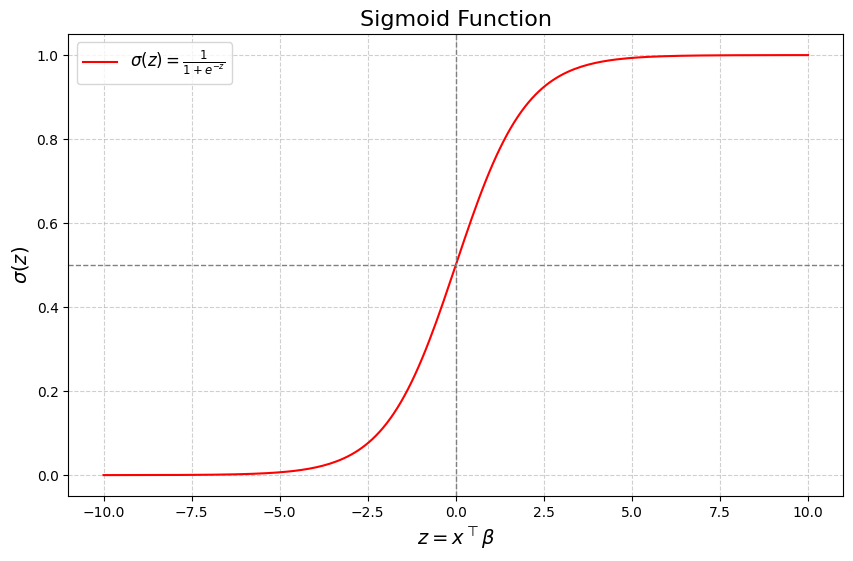

In [16]:
# Graph of sigmoid function
sigmoid_plot()

## Parameter Estimation

We want to estimate ${\pi}$ 

$$\hat{\pi} = \dfrac{e^{x^{\top} \hat{\beta}}}{1 + e^{x^{\top}\hat{\beta}}}$$  

but how do we estimate the parameter vector $\hat{\beta}$?

We use the maximum likelihood estimate which minimises the log-likelihood function so $\hat{\beta} = \hat{\beta}_{MLE}$


$\pi = P(Y = 1 |x, \beta) = F(x^{\top}\beta) = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}}$

$$
P(Y = y \mid x, \beta) =
\begin{cases}
\pi & \text{,} y = 1 \\
1 - \pi & \text{,} y = 0
\end{cases} = \pi^{y} (1 - \pi)^{1-y} = F(x^{\top} \beta)^{y} (1 - F(x^{\top} \beta))^{1 - y}
$$

Recalling the regressor matrix $X = \begin{bmatrix} X_{1\rightarrow} \\ \vdots \\ X_{i\rightarrow} \\ \vdots \\ X_{n\rightarrow} \end{bmatrix} = \begin{bmatrix} x_{1}^{\top} \\ \vdots \\ x_{i}^{\top}  \\ \vdots \\ x_{n}^{\top}  \end{bmatrix}$ where $x_{i}^{\top} = [1, x_{i2}, x_{i3}, \dots, x_{ip}]$ are the values of all predictors in the *i*-th observation.  

The logistic regression model uses the **sigmoid function** to map predicted values to probabilities

---

## Log Likelihood

The likelihood function becomes

$$
L(\beta) = \prod_{i=1}^{n} \left[ F(X_i^T \beta) \right]^{y_i} \left[ 1 - F(X_i^T \beta) \right]^{1 - y_i}
$$

Where:

$$
p_{i} = F(X_i^T \beta) = \frac{1}{1 + e^{-X_i^T \beta}}
$$

$p_{i}$ is the predicted probability of the *i*-th observation belonging to the positive class  

Using the logarithmic properties  

$$\ln(ab) = \ln(a) + \ln(b)$$  

and 

$$\ln(a^{b}) = b \ln(a)$$ 

We can rewrite the likelihood function as the **log-likelihood function**


$$
\ln L(\beta) = \sum_{i=1}^{n} \left[ y_i \ln F(X_i^T \beta) + (1 - y_i) \ln (1 - F(X_i^T \beta)) \right] = \sum_{i=1}^{n} \left[ y_i \ln p_i + (1 - y_i) \ln (1 - p_i)) \right]
$$


The goal is to find the parameters $\beta$ that maximise this log-likelihood.

---

### Calculate the baseline log-odds of the positive class

Lets assume no feature columns improved the prediction of a Malignant Diagnosis. The baseline prediction would be based on the log-odds of the positive rate.  

$$\text{logit}(p) = \hat{\beta}_0 = \ln\left(\frac{\text{positive rate}}{1 - \text{positive rate}}\right)
$$

In [17]:
positive_rate = (cancer_df['Diagnosis'] == 1).mean()

intercept_only = np.log(positive_rate / (1 - positive_rate))

print(intercept_only)

0.5211495071076268


### Initial Parameters

This essentially would be the initial bias estimate in the model before adjusting for additional predictor features. Setting the initial bias to this may lead to faster convergence during gradient descent as it can reduce the iterations needed to converge, but we will initialise it as $0$ along with the other $\beta$'s to keep things simple.

In [18]:
# Initialize parameters
n_samples, n_features = X_train_st.shape

# Initial estimate of B_1 - B_n
feature_betas = np.zeros((n_features, 1)) 

# Initial estimate of B_0
beta_0 = 0

### Calculate Predictions

Create a function that takes in the data and initial parameters then calculates the dot product of the observations and beta estimates $\hat{\beta}_1,  \dots , \hat{\beta}_{n}$ and adds the bias $\hat{\beta}_0$ and passes the result through the sigmoid function to find the predicted probabilities.

In [19]:
# Forward pass: compute predictions
def forward_pass(X, feature_betas, beta_0):
    """
    Compute predicted probabilities using logistic regression formula.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n_samples, n_features)
    feature_betas (numpy.ndarray): Coefficient vector (n_features, 1)
    beta_0 (float): Intercept (bias term)

    Returns:
    numpy.ndarray: Predicted probabilities for each observation (n_samples, 1)
    """
    z = np.dot(X, feature_betas) + beta_0
    p_i = sigmoid(z)
    return p_i

For the logistic setting the loss function is:

$$
\ell(\beta) = -\ln L(\beta)
$$

Maximum likelihood estimator (MLE):

$$
\hat{\beta}_{MLE} = \arg \max_{\beta} L(\beta)
= \arg \max_{\beta} \ln L(\beta)
= \arg \min_{\beta} \left(-\ln L(\beta)\right)
= \arg \min_{\beta} \ell(\beta)
$$

**Convexity and Global Minimum**  

It can be shown that the loss function $ \ell(\beta) = -\ln L(\beta)$ is a **convex function** in $\beta$, since $\ln L(\beta)$ is concave.  

This convexity guarantees a **unique global minimum** for the optimization problem.  

---


## Logistic Regression Loss Function and Gradient

The **negative log-likelihood (loss function)** for logistic regression is:

$$
\ell(\beta) = - \sum_{i=1}^{n} \left[ y_i \ln p_i + (1 - y_i) \ln (1 - p_i) \right]
$$

Where:

- $n$ = number of observations  
- $p_i$ = predicted probability for observation $i$  
- $y_i$ = actual binary outcome (0 or 1) for observation $i$  
- $p_i = F(X_i^T \beta) = \frac{1}{1 + e^{-X_i^T \beta}}$

---


In [20]:
# Compute binary cross-entropy loss
def compute_loss(y_i, p_i):
    # Define epsilon to avoid log(0)
    epsilon = 1e-8  
    # Calculate the average log-likelihood loss value
    log_loss = -np.mean(y_i * np.log(p_i + epsilon) + (1 - y_i) * np.log(1 - p_i + epsilon))
    return log_loss

## Gradient of the Loss Function

Taking the derivative with respect to $\beta$ gives the gradient:

$$
\nabla_\beta \ell(\beta) = \sum_{i=1}^{n} (p_i - y_i) X_i
$$

Or more compactly in matrix notation:

$$
\nabla_\beta \ell(\beta) = X^T (p - y)
$$

---


In [21]:
# Compute gradients of the loss w.r.t. weights and bias
def compute_gradients(X, y_i, p_i):
    n_samples = X.shape[0]
    dw = np.dot(X.T, (p_i - y_i)) / n_samples
    db = np.mean(p_i - y_i)
    return dw, db

## Notation:

- $X$ is an $n \times k$ matrix:  
  - $n$ = number of observations (rows)  
  - $k$ = number of predictors (columns, including an intercept if applicable)
- $p$ is an $n \times 1$ vector of predicted probabilities  
- $y$ is an $n \times 1$ vector of actual labels $(0$ or $1)$

---


## Optimise Parameters

The gradient $\nabla_\beta \ell(\beta)$ shows how to adjust the model parameters $\beta$ to reduce the loss.  

  It's used in optimization algorithms like:  

  - **Gradient Descent**:
    $$
    \beta^{(t+1)} = \beta^{(t)} - \alpha \nabla_\beta \ell(\beta^{(t)})
    $$
  - **Newton-Raphson (or Iteratively Reweighted Least Squares for logistic regression)** — a second-order method using the Hessian for faster convergence.
- Minimizing this loss function finds the **maximum likelihood estimate (MLE)** of $\beta$.

---


### Gradient Descent Method

In [22]:
# Update the weights and biases by subtracting the product of 
# the learning rate * derivatives w.r.t. weights / bias accordingly

def gradient_descent(feature_betas, beta_0, dw, db, alpha):
    # Shorthand for a = a - b is a -= b 
    feature_betas -= alpha * dw
    beta_0 -= alpha * db
    return feature_betas, beta_0

## Hessian of the Loss Function

The **Hessian matrix** is the matrix of second derivatives of the loss function with respect to the parameters $\beta$.

For logistic regression, the Hessian is:

$$
H(\beta) = X^T W X
$$

Where:

- $W$ is an $n \times n$ diagonal matrix with entries:
  $$
  w_i = p_i (1 - p_i)
  $$

---

## Newton-Raphson (Iteratively Reweighted Least Squares) Update

Using both the gradient and the Hessian, the **Newton-Raphson update step** for $\beta$ is:

$$
\beta^{(t+1)} = \beta^{(t)} - H^{-1}(\beta^{(t)}) \nabla_\beta \ell(\beta^{(t)})
$$

In matrix form:

$$
\beta^{(t+1)} = \beta^{(t)} + (X^T W X)^{-1} X^T (y - p)
$$

---

## Why This Matters:

- The Hessian captures the **curvature** of the loss function.  
- Using it with the Newton-Raphson method allows for **faster, quadratic convergence** compared to first-order methods like gradient descent.  
- Especially useful in logistic regression where the log-likelihood is concave and has a unique maximum.  

Newton-Raphson is the basis for many statistical modeling tools (like `statsmodels`' `Logit` or `GLM` in Python) that solve logistic regression models via maximum likelihood.

---


In [23]:
# Training function: runs gradient descent loop
def train_model(X, y, alpha = 0.001, epochs=1000):
    """
    Train a logistic regression model using gradient descent.

    Parameters:
    -----------
    X : numpy.ndarray, shape (n_samples, n_features)
        Feature matrix containing the input data.
    y : numpy.ndarray, shape (n_samples, 1) or (n_samples,)
        Binary target vector (0 or 1) for each observation.
    alpha : float, optional (default=0.001)
        Learning rate that controls the step size in gradient descent updates.
    epochs : int, optional (default=1000)
        Number of iterations (epochs) to run the training loop.

    Returns:
    --------
    feature_betas : numpy.ndarray, shape (n_features, 1)
        Learned coefficients (weights) for each feature.
    beta_0 : float
        Learned intercept (bias) term.
    losses : list of float
        List of loss values computed at each epoch, useful for monitoring convergence.
    """
    n_features = X.shape[1]
    feature_betas = np.zeros((n_features, 1))
    beta_0 = 0
    loss_hist = []
    betas_hist = []
    beta_0_hist = []
    dw_hist = []
    db_hist = []

    for i in range(epochs):
        # Forward pass
        p_i = forward_pass(X, feature_betas, beta_0)

        # Loss
        log_loss = compute_loss(y, p_i)
        
        # Gradients
        dw, db = compute_gradients(X, y, p_i)

        # Parameter update
        feature_betas, beta_0 = gradient_descent(feature_betas, beta_0, dw, db, alpha)

        # Track histories
        loss_hist.append(log_loss)
        betas_hist.append(feature_betas.copy())
        beta_0_hist.append(beta_0)
        dw_hist.append(dw.copy())
        db_hist.append(db)

        # Occasionally print loss
        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {log_loss:.4f}')

    return feature_betas, beta_0, loss_hist, betas_hist, beta_0_hist, dw_hist, db_hist


In [24]:
feature_betas, beta_0, loss_hist, beta_hist, beta_0_hist, dw_hist, db_hist = train_model(X_train_st, y_train, alpha = 0.001, epochs = 1000)

Epoch 0, Loss: 0.6931
Epoch 100, Loss: 0.5464
Epoch 200, Loss: 0.4607
Epoch 300, Loss: 0.4049
Epoch 400, Loss: 0.3655
Epoch 500, Loss: 0.3359
Epoch 600, Loss: 0.3128
Epoch 700, Loss: 0.2942
Epoch 800, Loss: 0.2788
Epoch 900, Loss: 0.2657


### Visualise Binary Cross-Entropy Loss

In [25]:
plot_optimised_betas(beta_hist, loss_hist)

[Beta Optimisation Plotly](https://mickeyadd.github.io/my_risk_toolkit/Machine%20Learning%20Notes/Classification%20Models/beta_optimisation_plotly.html)

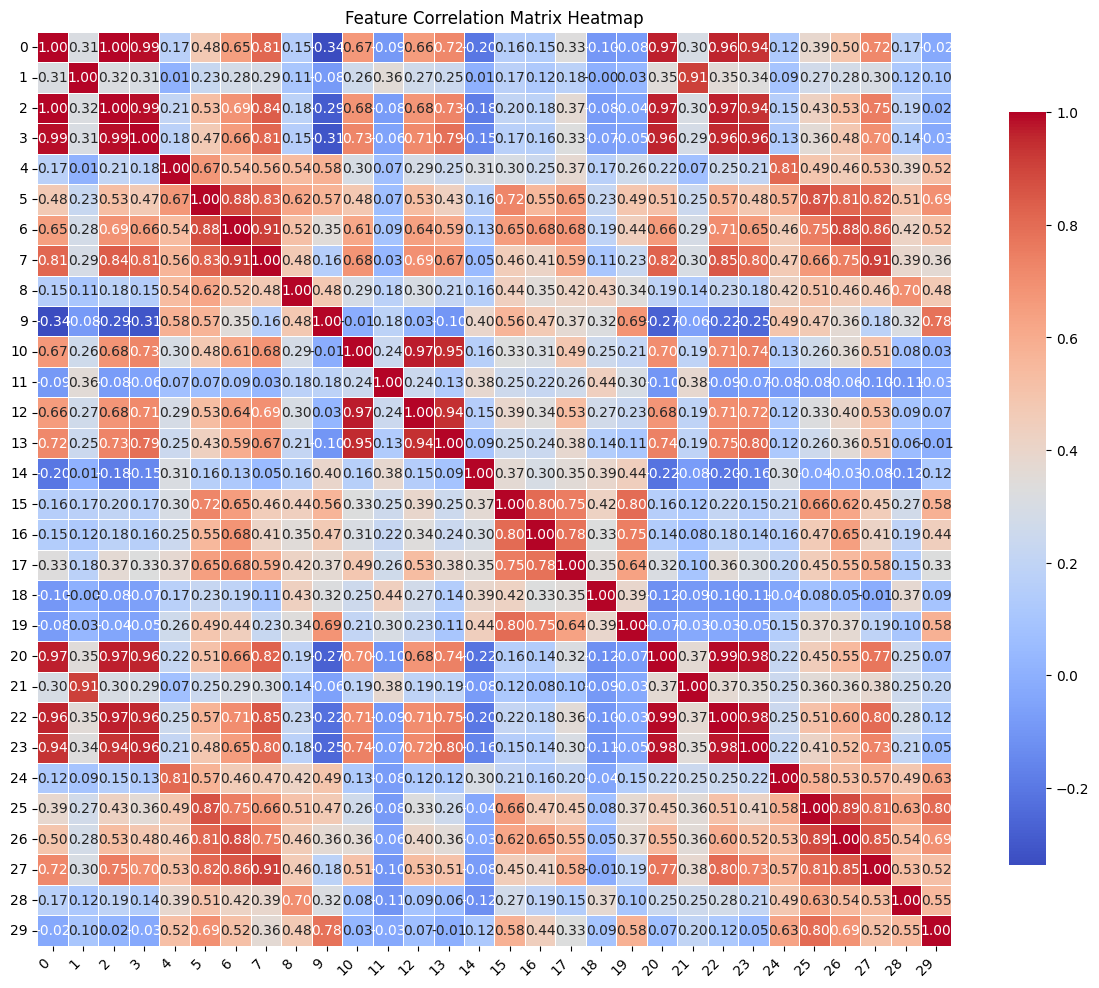

In [26]:
corr_matrix = pd.DataFrame(X_train_st).corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title('Feature Correlation Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

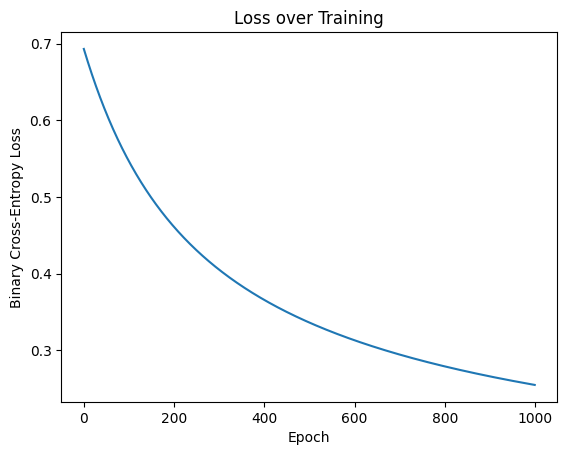

In [27]:
loss_plot(losses=loss_hist)

In [28]:
# Predict on test set
y_test_pred = sigmoid(np.dot(X_test_st, feature_betas) + beta_0)
y_test_pred_label = (y_test_pred > 0.5).astype(int)

## Evaluation Metrics

**Accuracy**: Proportion of the data correctly predicted  

$$\text{Accurary} = \dfrac{TP + TN}{TP + TN + FP + FN}$$

In [29]:
# Evaluate accuracy
accuracy = np.mean(y_test_pred_label == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.9735


**Precision**: Positive Predictive Value (PPV)  

$$PPV = \dfrac{TP}{TP + FP}$$

In [30]:
def precision_score(y_true, y_pred):
    """
    Calculate precision: TP / (TP + FP)

    Parameters:
    -----------
    y_true : array-like, shape (n_samples,)
        True binary labels (0 or 1).
    y_pred : array-like, shape (n_samples,)
        Predicted binary labels (0 or 1).

    Returns:
    --------
    precision : float
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FP = np.sum((y_pred == 1) & (y_true == 0))
    
    if TP + FP == 0:
        return 0.0  # Avoid division by zero
    
    return TP / (TP + FP)

In [31]:
precision = precision_score(y_test, y_test_pred_label)
print(f'Precision: {precision:.4f}')

Precision: 0.9857


**Sensitivity or Recall**: The True Positive Rate (TPR)

$$TPR = \dfrac{TP}{P} = \dfrac{TP}{TP + FN} = 1 - FNR$$

In [32]:
def recall_score(y_true, y_pred):
    """
    Calculate recall: TP / (TP + FN)

    Parameters:
    -----------
    y_true : array-like, shape (n_samples,)
        True binary labels (0 or 1).
    y_pred : array-like, shape (n_samples,)
        Predicted binary labels (0 or 1).

    Returns:
    --------
    recall : float
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    TP = np.sum((y_pred == 1) & (y_true == 1))
    FN = np.sum((y_pred == 0) & (y_true == 1))
    
    if TP + FN == 0:
        return 0.0  # Avoid division by zero
    
    return TP / (TP + FN)

In [33]:
recall = recall_score(y_test, y_test_pred_label)
print(f'Recall Score: {recall:.4f}')

Recall Score: 0.9718


**F1 Score**: Provides a balance between precision and recall

$$\text{F1 Score} = 2 * \dfrac{\text{(Precision * Recall)}}{\text{(Precision + Recall)}}$$

In [34]:
def f1_score(y_true, y_pred):
    """
    Calculate F1 score: harmonic mean of precision and recall

    Parameters:
    -----------
    y_true : array-like, shape (n_samples,)
        True binary labels (0 or 1).
    y_pred : array-like, shape (n_samples,)
        Predicted binary labels (0 or 1).

    Returns:
    --------
    f1 : float
    """
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    if prec + rec == 0:
        return 0.0  # Avoid division by zero
    
    return 2 * (prec * rec) / (prec + rec)

In [35]:
f1 = f1_score(y_test, y_test_pred_label)
print(f'F1 Score (Harmonic Mean of Precision and Recall): {f1:.4f}')


F1 Score (Harmonic Mean of Precision and Recall): 0.9787


### Visualise Performance  

I will calculate ROC-AUC and plot it later when showing the sklearn method of this model.

**ROC-AUC**: Receiver Operator Characteristics - Area Under the Curve  

ROC plots the true positive rate (TPR) vs. the false positive rate (FPR) = 1 - Specificity  

Area Under the Curve is simply the area under the curve generated by plotting the ROC

## Feature Importance

In [36]:
# Feature names
feature_names = cancer_df.drop('Diagnosis', axis=1).columns

# Create DataFrame of weights
params_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': feature_betas.flatten()
})

# Sort by absolute weight value (most influential first)
params_df_sorted = params_df.reindex(params_df['Weight'].abs().sort_values(ascending=False).index)

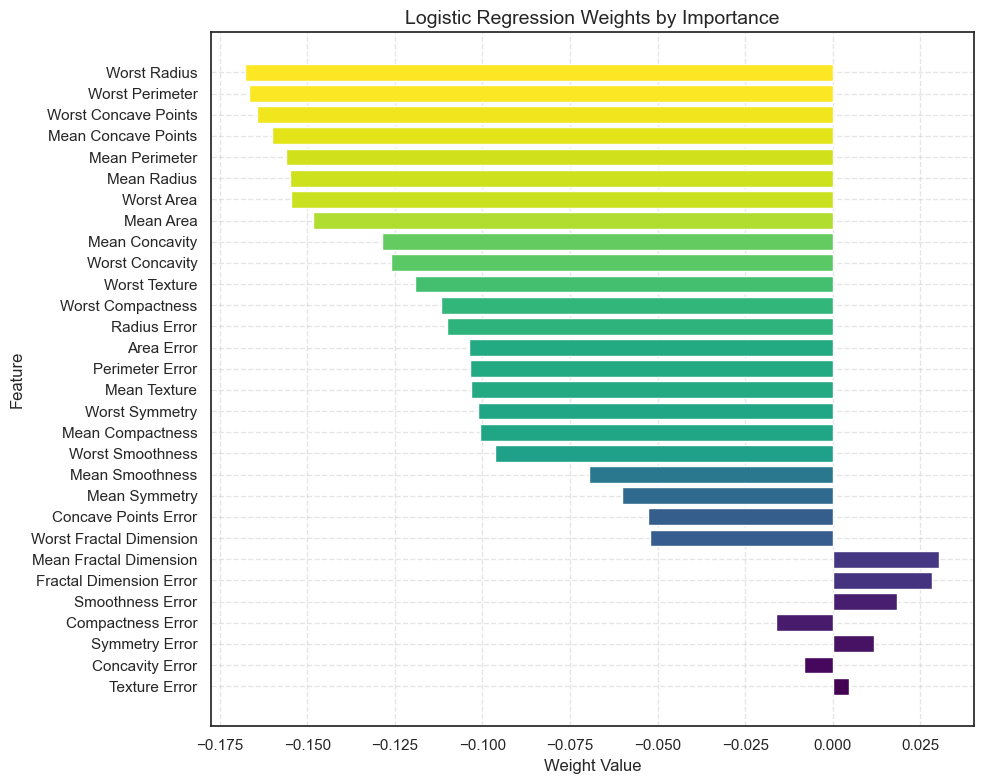

In [37]:
plot_model_weights_gradient(feature_betas, cancer_df.drop('Diagnosis', axis=1).columns,
                            title='Logistic Regression Weights by Importance', palette='viridis')

In [38]:
# Print bias
print(f"\nBias (Intercept): {beta_0:.4f}")


Bias (Intercept): 0.0970


## Summary

The logistic regression model uses the **sigmoid function** to map predicted values to probabilities:

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

Where:
- $ \beta_0 $ is the intercept.
- $ \beta_i $ are the model coefficients.
- $ X_i $ are the feature values.

The loss function used is the **log loss** (binary cross-entropy):

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \ln(p_i) + (1-y_i) \ln(1-p_i) \right]
$$


The bias (Intercept) is the baseline probability of the positive class and represents the log-odds of the positive class when all features are zero.

# Sklearn Model  

Python has many machine learning libraries to help optimise and simplify creating models like Logistic Regression. This section will focus on building the same model, but include optimisation techniques such as  

- Stratified Data
- Cross Validation
- Regularization (lasso and ridge)
- Grid Search to find optimal hyperparameters
- Pipelines
- Additional Performance Metrics

In [39]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load breast cancer data
data = load_breast_cancer()

# Create data frame of predictive features
X = pd.DataFrame(data.data, columns=data.feature_names)

# Create series (one-dimensional array) for the target data we are trying to predict
y = pd.Series(data.target)

## Split the data into training and test sets

Important to split the data prior to standardizing it as it prevents 'data leakage' or information learned during scaling the whole data set from being indirectly introduced to the model.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the data

There are 30 different feature columns with different units of measurement so lets standardize them.

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Compute scaling parameters (mean and standard deviation) on the training data then transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Then transform test data using the scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled[0]

array([-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
        0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
       -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
        3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
       -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
        1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014])

In [43]:
y_train

68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Length: 455, dtype: int64

## Fit The Model on Training Data

In [44]:
from sklearn.linear_model import LogisticRegression

# Define the model and parameters used
model = LogisticRegression(max_iter= 5000, random_state= 42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, random_state=42)

## Predict Test Data Using the Training Model

In [45]:
y_pred = model.predict(X_test_scaled)

y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [46]:
model.coef_

array([[-0.43190368, -0.38732553, -0.39343248, -0.46521006, -0.07166728,
         0.54016395, -0.8014581 , -1.11980408,  0.23611852,  0.07592093,
        -1.26817815,  0.18887738, -0.61058302, -0.9071857 , -0.31330675,
         0.68249145,  0.17527452, -0.3112999 ,  0.50042502,  0.61622993,
        -0.87984024, -1.35060559, -0.58945273, -0.84184594, -0.54416967,
         0.01611019, -0.94305313, -0.77821726, -1.20820031, -0.15741387]])

In [47]:
model.intercept_

array([0.44558453])

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791
ROC-AUC: 0.99737962659679

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Visualise classification performance on out of sample test data

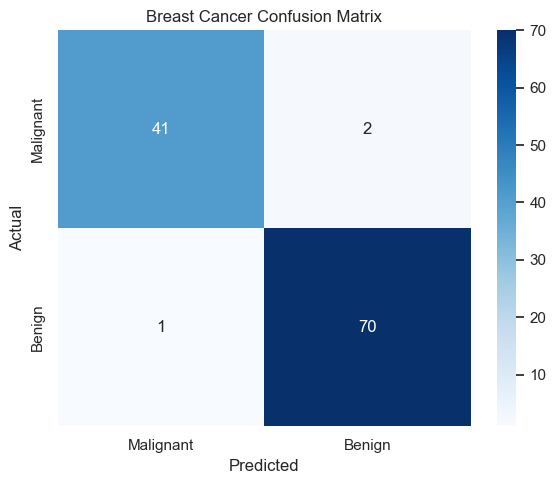

In [49]:
plot_confusion_matrix(y_test, y_pred, class_names=data.target_names, title = 'Breast Cancer Confusion Matrix')

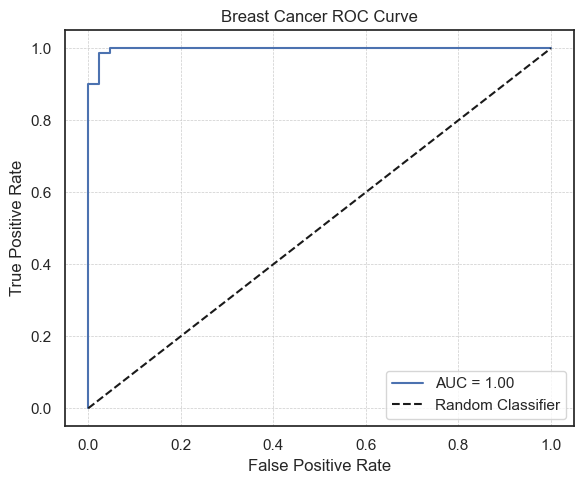

ROC AUC Score: 0.9974


In [50]:
plot_roc_curve(y_test, y_prob, title = 'Breast Cancer ROC Curve')

In [51]:
# 🔍 Check feature coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
print("\nLogistic Regression Coefficients (sorted by impact):")
print(coefficients.abs().sort_values(ascending=False))


Logistic Regression Coefficients (sorted by impact):
worst texture              1.350606
radius error               1.268178
worst symmetry             1.208200
mean concave points        1.119804
worst concavity            0.943053
area error                 0.907186
worst radius               0.879840
worst area                 0.841846
mean concavity             0.801458
worst concave points       0.778217
compactness error          0.682491
fractal dimension error    0.616230
perimeter error            0.610583
worst perimeter            0.589453
worst smoothness           0.544170
mean compactness           0.540164
symmetry error             0.500425
mean area                  0.465210
mean radius                0.431904
mean perimeter             0.393432
mean texture               0.387326
smoothness error           0.313307
concave points error       0.311300
mean symmetry              0.236119
texture error              0.188877
concavity error            0.175275
worst frac

## Cross-Validation

Use k-Fold Cross-Validation to validate model performance.

No split is needed for CV, but I like to hold out a portion of the data that is not tuned to test tuned model on out of sample data.

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold

# No split needed for CV itself unless you're holding out a final test set
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# 5-fold cross-validation with accuracy as scoring metric
scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')

print("Accuracy scores on each fold:", scores)
print("Mean accuracy: {:.3f}".format(scores.mean()))

Accuracy scores on each fold: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Mean accuracy: 0.981


In [53]:
from sklearn.model_selection import cross_validate

# Adding multiple scoring metrics to the cross validation results
cv_results = cross_validate(pipe, X, y, cv=5, scoring=['accuracy', 'roc_auc'])

print("Mean Accuracy:", np.mean(cv_results['test_accuracy']))
print("Mean ROC AUC:", np.mean(cv_results['test_roc_auc']))

Mean Accuracy: 0.9806862288464524
Mean ROC AUC: 0.9951873601644319


### Unbalanced data

Use StratifiedKFold for balanced class splits in each fold
This is crucial for imbalanced data — and breast cancer is slightly imbalanced (around 62% benign / 38% malignant)

In [54]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
print("StratifiedKFold CV accuracy:", scores.mean())

StratifiedKFold CV accuracy: 0.9736686849868033


## Logistic Regression with Regularization

In logistic regression, we used $\ell (\beta) = -\ln L (\beta)$ or *cross-entropy* to measure in-sample goodness of fit and sought to maximize the **log-likelihood** (or equivalently minimize the **negative log-likelihood**) to estimate $\hat{\boldsymbol{\beta}}^{\top} = [\beta_0, \beta_1, \dots, \beta_p]$.

The **regularized objective function** penalizes large values of the coefficients to control overfitting.

---

### Ridge $ (\ell_{2})$ Regularization  

We minimize:

$$
\mathcal{L} (\boldsymbol{\beta}, \lambda) = -\ln L(\beta_0, \beta_1, \dots, \beta_p) + \lambda \sum_{j=1}^p \beta_j^2
$$

**Where:**
- $L(\boldsymbol{\beta})$ is the likelihood of the data given the model parameters  
- $\lambda$ is the regularization strength (higher $\lambda$ → more shrinkage)  
- $\sum_{j=1}^p \beta_j^2$ is the **L2 penalty** (squared magnitudes of the coefficients)

This discourages large coefficient values but does **not set them to zero**.

---

### Lasso $ (\ell_{1})$ Regularization  

We minimize:

$$
\mathcal{L} (\boldsymbol{\beta}, \lambda) = -\ln L (\beta_0, \beta_1, \dots, \beta_p) + \lambda \sum_{j=1}^p |\beta_j|
$$

**Where:**
- $\sum_{j=1}^p |\beta_j|$ is the **L1 penalty** (absolute values of the coefficients)

This tends to shrink some coefficients exactly to zero, effectively doing **feature selection**.

---



## Regularization Summary


When there are many features that are moderately correlated  

- **Ridge** $(\ell_2)$  Shrinks coefficients, reduces multicollinearity with a penalty term $\lambda \sum \beta_j^2$   

When we want to remove or zero out less useful variables  

- **Lasso** $(\ell_1)$  Shrinks some coefficients to zero, does feature selection with a penalty term  $\lambda \sum$  $| \beta_{j}|$ 


## Ridge Model $(\ell_2)$

In [55]:
# Ridge Logistic Regression
ridge_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
ridge_model.fit(X_train_scaled, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_prob_ridge = ridge_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Ridge Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("Ridge ROC AUC:", roc_auc_score(y_test, y_prob_ridge))

Ridge Accuracy: 0.9736842105263158
Ridge ROC AUC: 0.99737962659679


## Lasso Model $(\ell_1)$

In [56]:
# Lasso Logistic Regression
lasso_model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lasso_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_prob_lasso = lasso_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Lasso Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("Lasso ROC AUC:", roc_auc_score(y_test, y_prob_lasso))

Lasso Accuracy: 0.9736842105263158
Lasso ROC AUC: 0.9963969865705864


## Evaluation of Regularisation Models

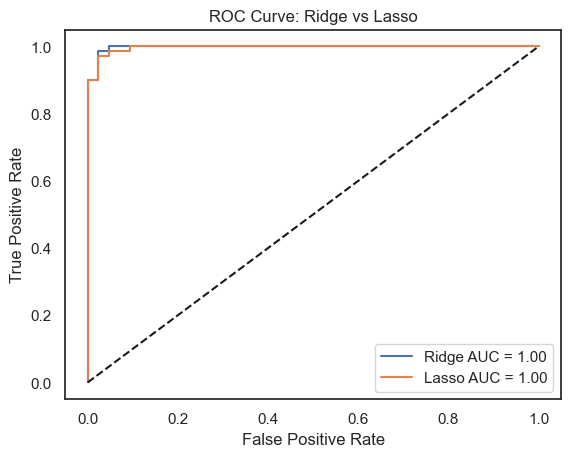

In [57]:
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_prob_ridge)
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_prob_lasso)

plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge AUC = {roc_auc_score(y_test, y_prob_ridge):.2f}')
plt.plot(fpr_lasso, tpr_lasso, label=f'Lasso AUC = {roc_auc_score(y_test, y_prob_lasso):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Ridge vs Lasso")
plt.legend()
plt.show()


## Cross Validated Results

In [58]:
from sklearn.linear_model import LogisticRegressionCV

# Logistic Regression with CV for Ridge (L2)
ridge_cv_model = LogisticRegressionCV(Cs=10, penalty='l2', solver='liblinear', cv=5)
ridge_cv_model.fit(X_train_scaled, y_train)
print("Best C for Ridge:", ridge_cv_model.C_[0])

# Logistic Regression with CV for Lasso (L1)
lasso_cv_model = LogisticRegressionCV(Cs=10, penalty='l1', solver='liblinear', cv=5)
lasso_cv_model.fit(X_train_scaled, y_train)
print("Best C for Lasso:", lasso_cv_model.C_[0])


Best C for Ridge: 0.3593813663804626
Best C for Lasso: 0.3593813663804626


### Feature Importance  

As noted earlier lasso can shrink some feature coefficients to zero (inherent feature selection) which can help when you want a more interpretable model with the most relevant features included.

In [59]:
# Create DataFrame for easier viewing

# Proper case the feature names  
proper_feature_names = [name.title() for name in feature_names]

importance_df = pd.DataFrame({
    'Feature': proper_feature_names,
    'Coefficient': lasso_cv_model.coef_.ravel() # Flatten coefficients to 1D
})


# Sort by absolute importance
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()

# Keep only features with non-zero coefficients
importance_df = importance_df[importance_df['Coefficient'] != 0]

# Sort by absolute importance
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print(importance_df[['Feature', 'Coefficient']])

                    Feature  Coefficient
20             Worst Radius    -1.774235
23               Worst Area    -1.666501
10             Radius Error    -1.346563
7       Mean Concave Points    -1.313717
21            Worst Texture    -1.190498
26          Worst Concavity    -0.582767
24         Worst Smoothness    -0.468042
28           Worst Symmetry    -0.451567
19  Fractal Dimension Error     0.267229
27     Worst Concave Points    -0.263255
15        Compactness Error     0.102688
1              Mean Texture    -0.035863


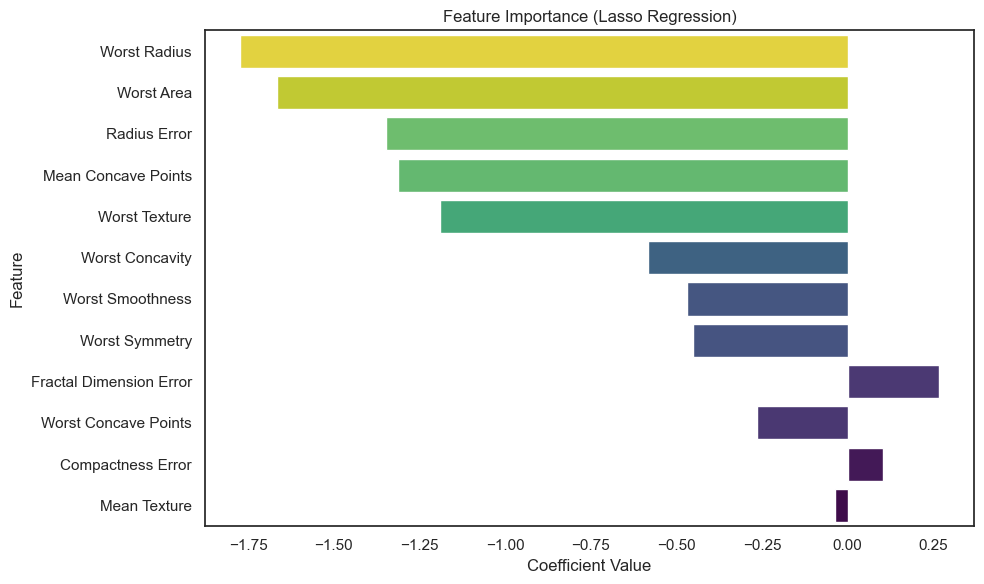

In [60]:
lasso_features_plot(importance_df)

## Hyperparameter Tuning

Key hyperparameters:
- `C`: Regularization strength (inverse of $ \lambda $).
- `penalty`: Regularization type (`l1`, `l2`, `elasticnet`).
- `solver`: Optimization algorithm.

Use `GridSearchCV` to find the best combination.

### Parameter Grid

In [61]:
# For Ridge (L2) and Lasso (L1)
param_grid = {
    'C': np.logspace(-4, 4, 20),   # Test C from 1e-4 to 1e4
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Only solver supporting both L1 and L2 penalties
}

In [62]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

# 5-fold cross-validation grid search
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc', verbose=1)

### Hyperparameters for the top model

In [63]:
print("Best parameters found:", grid_search.best_params_)
print("Best CV ROC AUC Score:", grid_search.best_score_)

Best parameters found: {'C': np.float64(0.08858667904100823), 'penalty': 'l2', 'solver': 'liblinear'}
Best CV ROC AUC Score: 0.9938067555020689


### Use best model to predict on test data

In [64]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))


Test Accuracy: 0.9912280701754386
Test ROC AUC: 0.998689813298395


### View all results of grid search

In [65]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['param_C', 'param_penalty', 'mean_test_score']]
print(results_df.sort_values(by='mean_test_score', ascending=False).head())


     param_C param_penalty  mean_test_score
15  0.088587            l2         0.993807
17  0.233572            l2         0.993394
19  0.615848            l2         0.993189
13  0.033598            l2         0.993185
21  1.623777            l2         0.992878


### Deviance

Behaves like RSS in linear regression (smaller deviance = better fit)

In [66]:
# Predicted probabilities
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Log-likelihood
log_likelihood = np.sum(y_test * np.log(y_prob) + (1 - y_test) * np.log(1 - y_prob))

# Deviance
deviance = -2 * log_likelihood

print(f"Model Deviance: {deviance:.4f}")


Model Deviance: 18.9387


### Null Deviance

How well a model with no predictors fits the data (intercept only)

In [67]:
# Intercept-only model
intercept_only = LogisticRegression(fit_intercept=True, penalty=None, solver='lbfgs')
intercept_only.fit(np.zeros((len(y_train), 1)), y_train)

# Predicted probabilities
y_prob_null = intercept_only.predict_proba(np.zeros((len(y_test), 1)))[:, 1]

# Log-likelihood for null model
log_likelihood_null = np.sum(y_test * np.log(y_prob_null) + (1 - y_test) * np.log(1 - y_prob_null))

# Null Deviance
null_deviance = -2 * log_likelihood_null

print(f"Null Deviance: {null_deviance:.4f}")

Null Deviance: 151.1057


### McFadden's Pseudo-$R^2$

$R^{2}_{\text{McFadden}} = 1 - \dfrac{D_{\text{model}}}{D_{\text{null}}}$

In [68]:
R2_mcfadden = 1 - (deviance / null_deviance)
print(f"McFadden's pseudo-R^2: {R2_mcfadden:.4f}")

McFadden's pseudo-R^2: 0.8747


## References


- Prof. Rob McCulloch’s lecture notes (http://www.rob-mcculloch.org/)
- An Introduction to Statistical Learning with Applications in R (ISLR); by James, Witten, Hastie, Tibshirani
- "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron
- [scikit-learn LogisticRegression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)